In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('voice.csv')

In [30]:
data.head(7)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male


In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB
None


In [32]:
data.label.unique

<bound method Series.unique of 0         male
1         male
2         male
3         male
4         male
5         male
6         male
7         male
8         male
9         male
10        male
11        male
12        male
13        male
14        male
15        male
16        male
17        male
18        male
19        male
20        male
21        male
22        male
23        male
24        male
25        male
26        male
27        male
28        male
29        male
         ...  
3138    female
3139    female
3140    female
3141    female
3142    female
3143    female
3144    female
3145    female
3146    female
3147    female
3148    female
3149    female
3150    female
3151    female
3152    female
3153    female
3154    female
3155    female
3156    female
3157    female
3158    female
3159    female
3160    female
3161    female
3162    female
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object>

In [33]:
data.label = [1 if each =="female" else 0 for each in data.label]
data.label.values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [34]:
data.tail(6)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3162,0.146023,0.092525,0.183434,0.041747,0.224337,0.182590,1.384981,5.118927,0.948999,0.659825,...,0.146023,0.195640,0.039506,0.275862,0.533854,0.007812,2.992188,2.984375,0.258924,1
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,1
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,1


In [35]:
data.head(6)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null int64
dtypes: float64(20), int64(1)
memory usage: 519.8 KB


In [39]:
y = data.label.values
x_data = data.drop(['label'], axis = 1)

In [40]:
print(y.shape)
y

(3168,)


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
print(type(y))

<class 'numpy.ndarray'>


In [42]:
print(type(x_data))

<class 'pandas.core.frame.DataFrame'>


In [15]:
print(x_data.shape)
x_data

(3168, 20)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920


In [18]:
print(type(x_data))

<class 'pandas.core.frame.DataFrame'>


In [19]:
np.min(x_data)

meanfreq    0.039363
sd          0.018363
median      0.010975
Q25         0.000229
Q75         0.042946
IQR         0.014558
skew        0.141735
kurt        2.068455
sp.ent      0.738651
sfm         0.036876
mode        0.000000
centroid    0.039363
meanfun     0.055565
minfun      0.009775
maxfun      0.103093
meandom     0.007812
mindom      0.004883
maxdom      0.007812
dfrange     0.000000
modindx     0.000000
dtype: float64

In [46]:
np.max(x_data)

meanfreq       0.251124
sd             0.115273
median         0.261224
Q25            0.247347
Q75            0.273469
IQR            0.252225
skew          34.725453
kurt        1309.612887
sp.ent         0.981997
sfm            0.842936
mode           0.280000
centroid       0.251124
meanfun        0.237636
minfun         0.204082
maxfun         0.279114
meandom        2.957682
mindom         0.458984
maxdom        21.867188
dfrange       21.843750
modindx        0.932374
dtype: float64

In [51]:
#normalization
#(x-min(x))/(max(x)-min(x))
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [53]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.2, random_state = 42)

In [56]:
#find transpose
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (20, 2534)
x_test shape: (20, 634)
y_train shape: (2534,)
y_test shape: (634,)


In [57]:
#parameter initialize and sigmoid function
#dimention=30
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    print(w)
    b = 0.0
    return w, b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#sigmoid(0)

In [65]:
#forward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

In [66]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [67]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [68]:
#logistic_regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.692360
Cost after iteration 10: 0.570539
Cost after iteration 20: 0.510995
Cost after iteration 30: 0.472210
Cost after iteration 40: 0.442623
Cost after iteration 50: 0.418237
Cost after iteration 60: 0.397345
Cost after iteration 70: 0.379065
Cost after iteration 80: 0.362863
Cost after iteration 90: 0.348376
Cost after iteration 100: 0.335335
Cost after iteration 110: 0.323530
Cost after iteration 120: 0.312793
Cost after iteration 130: 0.302985
Cost after iteration 140: 0.293990
Cost after iteration 150: 0.285712
Cost after iteration 160: 0.278069
Cost after iteration 170: 0.270989
Cost after iteration 180: 0.264414
Cost after iteration 190: 0.258291
Cost after iteration 200: 0.252575
Cost after iteration 210: 0.247227
Cost after iteration 220: 0.242212
Cost after iteration 230: 0.237501
Cost after iteration 240: 0.233067
Cost after iteration 250: 0.228886
Cost after iteration 260: 0.224937
Cost after iteration 270: 0.221202
Cost after iteration 280: 0.217

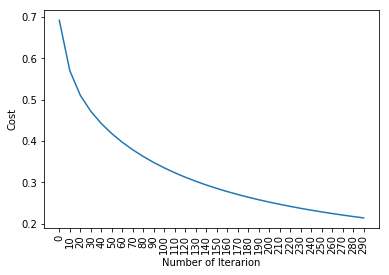

test accuracy: 97.1608832807571 %


In [69]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)

Cost after iteration 0: 0.692360
Cost after iteration 10: 1.830287
Cost after iteration 20: 0.945649
Cost after iteration 30: 0.619557
Cost after iteration 40: 0.510233
Cost after iteration 50: 0.411663
Cost after iteration 60: 0.325155
Cost after iteration 70: 0.261633
Cost after iteration 80: 0.221257
Cost after iteration 90: 0.201550
Cost after iteration 100: 0.192298
Cost after iteration 110: 0.185798
Cost after iteration 120: 0.180187
Cost after iteration 130: 0.175203
Cost after iteration 140: 0.170736
Cost after iteration 150: 0.166709
Cost after iteration 160: 0.163058
Cost after iteration 170: 0.159733
Cost after iteration 180: 0.156691
Cost after iteration 190: 0.153897


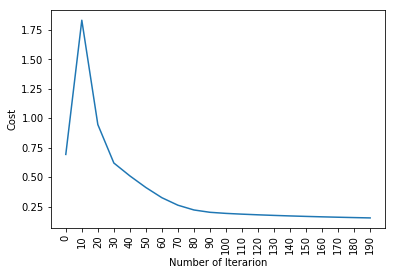

test accuracy: 97.94952681388013 %


In [70]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 3, num_iterations = 200)

Cost after iteration 0: 0.692360
Cost after iteration 10: 0.795272
Cost after iteration 20: 0.645705
Cost after iteration 30: 0.448314
Cost after iteration 40: 0.368932
Cost after iteration 50: 0.329773
Cost after iteration 60: 0.306344
Cost after iteration 70: 0.288460
Cost after iteration 80: 0.273378
Cost after iteration 90: 0.260396
Cost after iteration 100: 0.249096
Cost after iteration 110: 0.239171
Cost after iteration 120: 0.230384
Cost after iteration 130: 0.222553
Cost after iteration 140: 0.215529
Cost after iteration 150: 0.209195
Cost after iteration 160: 0.203455
Cost after iteration 170: 0.198230
Cost after iteration 180: 0.193453
Cost after iteration 190: 0.189071
Cost after iteration 200: 0.185035
Cost after iteration 210: 0.181308
Cost after iteration 220: 0.177855
Cost after iteration 230: 0.174646
Cost after iteration 240: 0.171658
Cost after iteration 250: 0.168868
Cost after iteration 260: 0.166257
Cost after iteration 270: 0.163809
Cost after iteration 280: 0.161

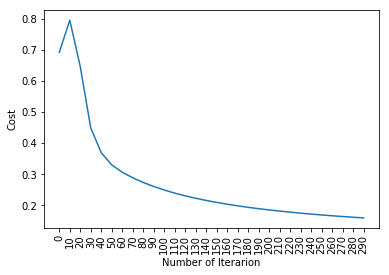

test accuracy: 97.94952681388013 %


In [71]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 2, num_iterations = 300)

In [72]:
print(x_train.shape)
print(y_train.shape)

(20, 2534)
(2534,)


In [77]:
#sklearn with logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy: {} ".format(lr.score(x_test.T,y_test.T)))

Test Accuracy: 0.9810725552050473 
